In [1]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym_map_bro
import gym_map_bro.src.toy_agents as toy_agents
from gym_map_bro.src.data import *
from gym_map_bro.src.datastore import *

env = gym.make('map-bro-v0')

In [2]:
env_config = {
    "col" : "dns.col",
    "N_batch": 5,										# Number of new lines to try to add to the datastores each epoch
    "batch_stocahsitic": False,							# Whether or not the number of lines in each batch is constant (False) or not (True)
    "name": ['deletion','Hot','Warm','Cold'],			# Names to identify different storage formats
    "ds_size": [10, 20, 40],							# Number of lines in each datastore
    "ds_frac": [1, 0.5, 0.25],							# Value coefficient associated with each storage option
    "val_weight": [np.array([1,1,1]),np.array([1,1,1]),np.array([1,1,1])],								# Weights applied to each value column
    "val_func": linear_val_func,# function for determining total value from various value columns
    "ds_decay": [0.9, 0.95, 0.99],						# Rate at which Value decays in each DataStore
    "vals": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Values associated with each line of data
               pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
               pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])],
    "init_rplan": [np.hstack((np.mgrid[0:10, 1:4][1],np.zeros(10).reshape(-1,1))),
                    np.hstack((np.mgrid[0:20, 1:4][1],np.zeros(20).reshape(-1,1))),
                    np.hstack((np.mgrid[0:40, 1:4][1],np.zeros(40).reshape(-1,1)))], #Initially start with a hot to cold retention plan for data
    "ind": [np.zeros(5),np.zeros(10),np.zeros(40)], #All data is initialized to the first step of it's rplan
    "init_expir": [3,10,20], #Data 20 time steps old must be re-evaluated
    "df": [pd.DataFrame(index = np.arange(10),columns=['Age','Key Terrain','Queries']),		# Dataframes that hold actual datastore contents
           pd.DataFrame(index = np.arange(20),columns=['Age','Key Terrain','Queries']),
           pd.DataFrame(index = np.arange(40),columns=['Age','Key Terrain','Queries'])]
}

In [3]:
env.__myinit__(env_config)
np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals_plot = [[0],[0],[0]]
t = 0

1 rows expired in 1    Age  Key Terrain   Queries
0  1.0     0.749036  0.651309
1  1.0     0.790533  0.381446
2  2.0     0.861476  0.804333
3  2.0     0.911049  0.040155
4  3.0     0.937294  0.933600
1 rows expired in 2     Age  Key Terrain   Queries
0   9.0     0.728948  0.569196
1   7.0     0.686291  0.602076
2  10.0     0.732142  0.890112
3   3.0     0.747382  0.155701
4   5.0     0.830197  0.842935
5   7.0     0.665082  0.738402
6   2.0     0.630017  0.272040
7   4.0     0.394154  0.607407
8   1.0     0.189530  0.930547
9   3.0     0.752491  0.006238
0 rows expired in 3      Age  Key Terrain   Queries
0    9.0     0.423655  0.645894
1   14.0     0.715189  0.602763
2   11.0     0.647197  0.600392
3   13.0     0.790840  0.097243
4   15.0     0.519952  0.693956
5   13.0     0.891773  0.963663
6   13.0     0.813679  0.509807
7   12.0     0.700856  0.913284
8    6.0     0.346608  0.506532
9   12.0     0.774501  0.140957
10  11.0     0.662856  0.845365
11  15.0     0.519952  0.693956
12 

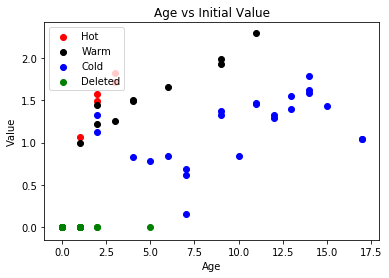

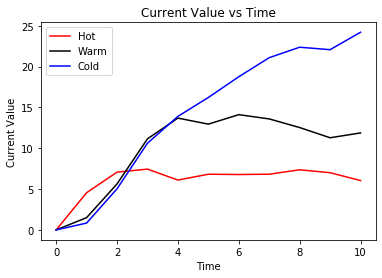

[[nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [nan, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [5.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [2.0, 0.0], [1.0, 0.0], [0.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]


In [15]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pd.read_csv("dns.log",header = 0)
vals = pd.DataFrame(np.random.random((5,3)),columns=['Age','Key Terrain','Queries'])
vals['Age'] = 0
val_tot = np.zeros(5)
rplan = np.hstack((np.mgrid[0:5, 1:4][1],np.zeros(5).reshape(-1,1)))
ind = np.zeros(5)
loop += 5
db = dataBatch(batch,vals,val_tot,ind,rplan)

toy_agents.batch_load(env, db, 100)
t += 1
env.render(out=0)
clr = ['r','k','b']
sub = plt.subplot()
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
for i in np.arange(env.num_ds):
    vals_plot[i].append(sum(env.ds[env.names[i+1]].dataBatch.get('val_tot')))
    sub.plot(np.arange(t+1),vals_plot[i], c = clr[i], label = env.names[i+1])

sub.legend(loc=2)
plt.show()

#env.render(out=1)
print(env.del_val)

In [16]:
for i in np.arange(len([])):
    print('hi')

In [17]:
len([])

0